
# Capstone Project: Credit Card Fraud Detection

By: Shanmuga Ambigan Pillai

Foreword: The reason why I had chosen this topic is because I am currently working in the similar field and this topic does interest me as I wanted to put my new learnt skill sets in Data science in eliminating fraud. 

# About the Dataset 

The data was obtained from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data) and consists of  credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

The dataset consists of 28 anonymized features, named 'V1' through 'V28', (e.g., time, location, etc.), The transaction amount in EURO(€) and the classification of teh transaction, 1 being fradulent and 0 being not. 

It is difficult to understand what the dataset actually means when you look at it at first because the anonymized data is used to protect the card holders information but we are still hoping to get some insights that will be useful in considering how we should build our fraud detector.


# Problem Statement

Credit card fraud is a problem to both card members and banks, and has seen an increase over the years with new types of fraud such as identity theft on the rise too. Fraud can cause huge financial loss to card members and/or banks and this project is hoping to address that issue and hopefully tackle the problems. In 2022, the Federal trade Commission (FTC), had quoted to receive over 5.1 million reports, from which Fraud charges makes up 2.4 million of those reports(46%) and Identify theft was 1.1 million (22%) racking up a total of 68% of total reports were linked with fraud.

This project is looking to deploy the use of machine learning with various modeling to effectively combat Credit Card Fraud by detecting transactions at the preliminary stage which are fraud. By deploying these to banks fraud surveillance systems, the banks are able to forcast transactions that are fraud and notify and confirm with the card members if the charges are fraud or genuine. 

Mentioned below is deployment of SMART goals in answering the problem statement:

**SMART Goal**

**Specific:**

Developing a machine learning model to detect fraudulent credit card transactions by using a combination of logistic regression, decision trees, random forests and support vector machines (SVM) and identifying which model works best and to see a work around a combination to achieve 

**Measurable:**

Metrics: Accuracy, precision, recall, F1 score, and area under the ROC curve.

**Achievable:**

Machine learning can be effectively used for credit card fraud detection and is actually a common application in the field. The goal is to identify fraudulent transactions based on patterns and anomalies in the data and with the utilization of various ML tools we are hoping to filter out the fraud cahres from the data set.

**Relevant:**

The goal aligns with the  objective to enhance transaction security and reduce fraud-related losses.
Successfully detecting fraudulent transactions will significantly improve the company's operational loss to fraud charges and  increase overall customer satisfaction and confidence in spending with their credit cards thus also incresing revenue for companies that offer credit cards . 

However the data doesnt actually tell us what each values mean so it is difficult for the applicability to the real world or at least understanding it. 

**Time-Bound:**

Deadline: 19th of June 2024 



In [101]:
#Lets start by importing the necesary tools required for the project:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.metrics import RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [102]:
#Next lets import the dataset obtained from Kaggle :
data= pd.read_csv('./creditcard_2023.csv')

In [103]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data Cleaning

In [104]:
df= pd.read_csv('./creditcard_2023.csv')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [106]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [107]:
df = df.drop('id', axis=1)

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in data analysis and involves summarizing the main characteristics of a dataset, often with visual methods.Lets look at the Correlation, Scaling the sample and Z- scores.


In [108]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


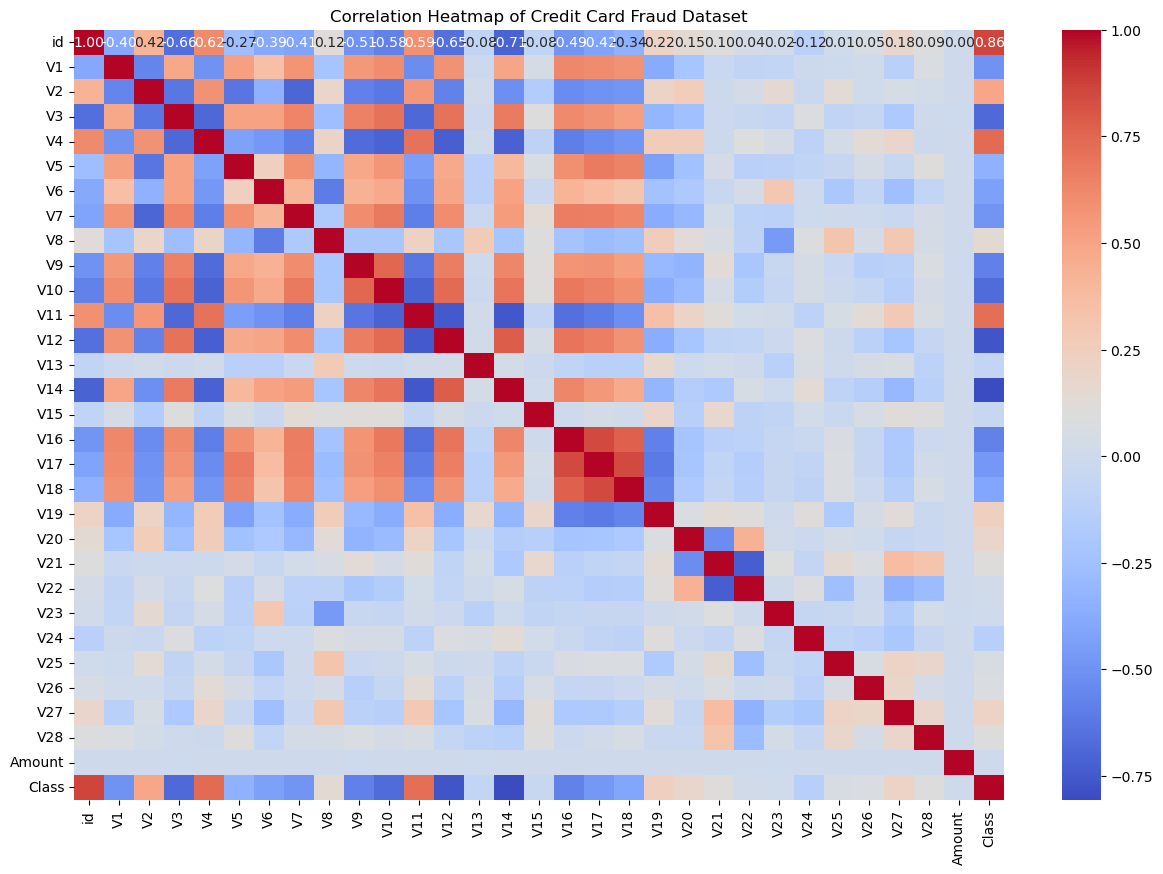

In [109]:
#Heatmap for correlation  
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Credit Card Fraud Dataset')
plt.show()

In [110]:
# Calculating Z- Scores for V1-V28 :
new=[]
for i in data.columns.values:
    data['z-scores']=(data[i]-data[i].mean())/data[i].std()
    outliers=np.abs(data['z-scores']>3).sum()
    if outliers>0:
        new.append(i)
        print(i," : ",outliers)

thres=2
print(len(data))

for i in data[new]:
    upper=data[i].mean()+thres*data[i].std()
    lower=data[i].mean()-thres*data[i].std()
    data=data[(data[i]>lower)&(data[i]<upper)]

print(len(data))

V2  :  9085
V3  :  1273
V4  :  3
V5  :  3005
V6  :  4740
V7  :  1298
V8  :  11738
V9  :  2829
V10  :  2523
V12  :  823
V13  :  1061
V14  :  1372
V15  :  1163
V16  :  2205
V17  :  6069
V18  :  4086
V19  :  749
V20  :  5113
V21  :  3948
V22  :  5972
V23  :  6132
V24  :  189
V25  :  4781
V26  :  1269
V27  :  6416
V28  :  2392
568630
170668


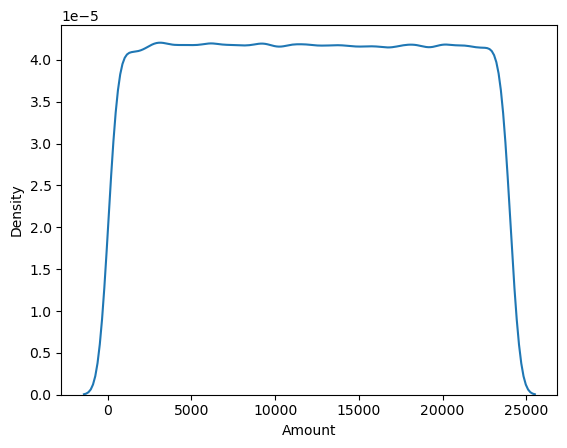

In [111]:
#Plotting the amount/value of charges(Euro,€)
sns.kdeplot(data=df['Amount'])
plt.show()

Observation: Data sets shows a normal distribution for amount charged seen.

# Data Modelling and Evaluation


1.0 Logestic Regression

In [112]:
lr = LogisticRegression()

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ('./creditcard_2023.csv') 
data = pd.read_csv(file_path)

# Ensure data is a DataFrame
data = pd.DataFrame(data)

# Drop the 'id' column if it exists
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Normalize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features (X) and labels (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to ensure everything is correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454904, 29) (113726, 29) (454904,) (113726,)


In [114]:
# Logistic Regression model
Log=LogisticRegression()
Log.fit(X_train,y_train)
y_pred=Log.predict(X_test)

In [115]:
#Defining terms: 80: 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [116]:
X = data.drop(columns=['Class'])
y = data['Class']

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[55593  1270]
 [ 2715 54148]]


In [119]:
#Classification report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



In [120]:
t= accuracy_score(y_test, y_pred)*100
print(t)

96.49596398360973


2.0 Decision Tree Model

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ('./creditcard_2023.csv')
data = pd.read_csv(file_path)

# Ensure data is a DataFrame
data = pd.DataFrame(data)

# Drop the 'id' column if it exists
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Normalize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features (X) and labels (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to ensure everything is correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454904, 29) (113726, 29) (454904,) (113726,)


In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56683   180]
 [   73 56790]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



3.0 Random Forest

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ('./creditcard_2023.csv') 
data = pd.read_csv(file_path)

# Ensure data is a DataFrame
data = pd.DataFrame(data)

# Drop the 'id' column if it exists
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Normalize the 'Amount' column using Standard Scaler
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features (X) and labels (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to ensure everything is correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454904, 29) (113726, 29) (454904,) (113726,)


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56844    19]
 [    0 56863]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



4.0 Neural Network

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = ('./creditcard_2023.csv')  
data = pd.read_csv('./creditcard_2023.csv')

# Ensure data is a DataFrame
data = pd.DataFrame(data)

# Drop the 'id' column if it exists
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Normalize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data into features (X) and labels (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to ensure everything is correct
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454904, 29) (113726, 29) (454904,) (113726,)


In [126]:
pip install tensorflow

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 7s 961us/step - accuracy: 0.9236 - loss: 0.1950 - val_accuracy: 0.9808 - val_loss: 0.0499
Epoch 2/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9723 - loss: 0.0725 - val_accuracy: 0.9915 - val_loss: 0.0299
Epoch 3/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 5s 925us/step - accuracy: 0.9774 - loss: 0.0589 - val_accuracy: 0.9917 - val_loss: 0.0260
Epoch 4/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 5s 888us/step - accuracy: 0.9792 - loss: 0.0531 - val_accuracy: 0.9928 - val_loss: 0.0231
Epoch 5/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 6s 967us/step - accuracy: 0.9800 - loss: 0.0505 - val_accuracy: 0.9914 - val_loss: 0.0229
Epoch 6/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 5s 901us/step - accuracy: 0.9811 - loss: 0.0499 - val_accuracy: 0.9933 - val_loss: 0.0208
Epoch 7/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 5s 909us/step - accuracy: 0.9821 - loss: 0.0490 - val_accuracy: 0.9934 - val_loss: 0.0204
Epoch 8/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9819 - los

In [128]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step - accuracy: 0.9977 - loss: 0.0139
Test Loss: 0.015243844129145145
Test Accuracy: 0.9975115656852722


In [129]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)


# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate and print accuracy score
ann_score = accuracy_score(y_test, y_pred)
print(f'ANN Score (Accuracy): {ann_score}')

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step
[[56631   232]
 [   51 56812]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ANN Score (Accuracy): 0.9975115628792008
